# TEST Nabil. ES-SEMLALI IDRISSI

***content :***

>Data Collection

>Data Cleaning:
* Handling Messing Values
> Data Understanding & Preparation:
* balance of the dataset
* Correlation
* PCA: Reduce demensions
> Modelisation:
* Spliting Data
* Training Model
* Optimization
* Cross Validation
> Evaluation:
> Serialization
* Saving the model



***** API REST Built on Pipeline.py File *****





----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1265]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

# Data collection :

In [1266]:
df=pd.read_csv(r'Uploads/nba_logreg.csv')

# Data understanding and Preparation:

* balance of the dataset:

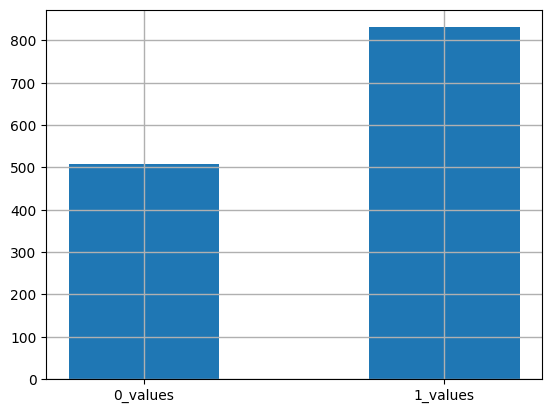

In [1267]:

count = df.pivot_table(index = ['TARGET_5Yrs'], aggfunc ='size')
width=0.5
plt.bar(["0_values","1_values"],[count[0],count[1]], width)
plt.grid(linestyle='-', linewidth=1)


we can see that the values 1 is the most dominant part of our DataSet, a too wide interval between the two groups can cause pronlemes of overffiting, when training the Module

* Data summurise:

In [1268]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [1269]:
df.shape

(1340, 21)

* Define Data_set and Data_target to fit the models:

In [1270]:
#data_set
df_train = df.drop(['TARGET_5Yrs','Name'],axis=1)

#Array_dataset
paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values
labels=df['TARGET_5Yrs'].values


* Check missing Values:

In [1271]:
df_train.isna().sum()

GP          0
MIN         0
PTS         0
FGM         0
FGA         0
FG%         0
3P Made     0
3PA         0
3P%        11
FTM         0
FTA         0
FT%         0
OREB        0
DREB        0
REB         0
AST         0
STL         0
BLK         0
TOV         0
dtype: int64

* Correlation

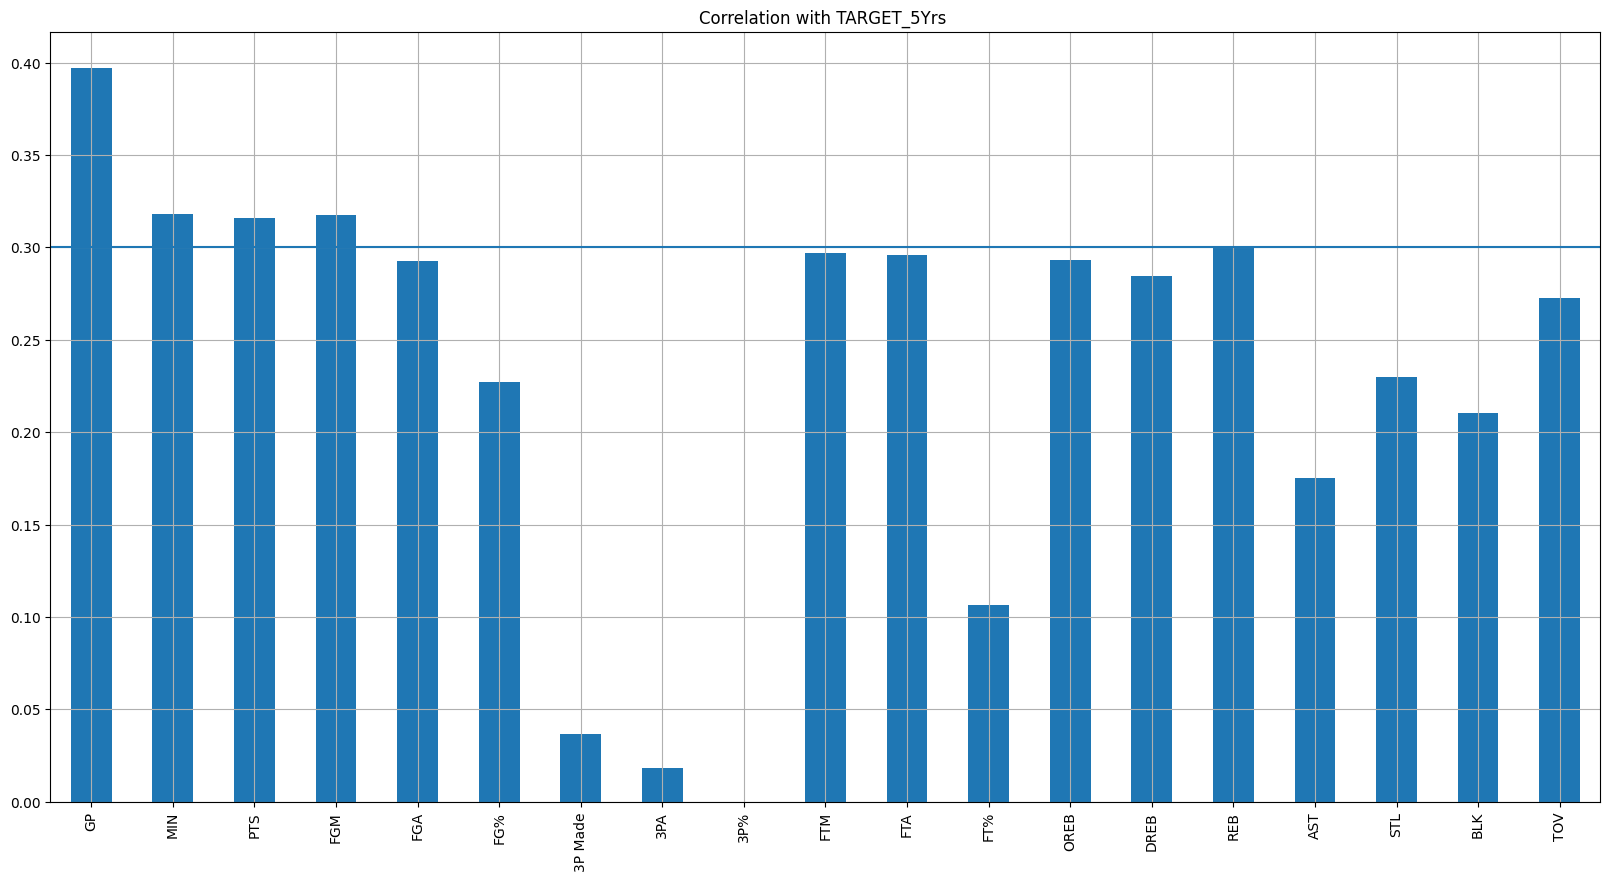

In [1272]:
df_train=df_train.fillna(value=0.0)

df_train.corrwith(df['TARGET_5Yrs']).plot.bar(figsize = (20, 10), title = "Correlation with TARGET_5Yrs ", grid = True)
plt.axhline(0.3)

We can see that the first 4 ranks are more correlated with our target

In [1273]:
for x in np.argwhere(np.isnan(df_vals)):
    df_vals[x]=0.0


* Normalisation with MinMax scaling preprocessing

In [1274]:

Norm_set = MinMaxScaler().fit_transform(df_vals)

Norm_affich_BAR=Norm_set

* PCA: Reduce demensions

I will apply a principal component analysis (PCA). This method allows to reduce the dimension which leads to a loss of information.


[0.54784537 0.72686864 0.79645117 0.85386431 0.88570606 0.91270989
 0.93489845 0.94912233 0.9616472  0.97335695 0.98384583 0.98978451
 0.99443835 0.99829602 0.9992851  0.99969263 0.99997437 0.99999109
 1.        ]


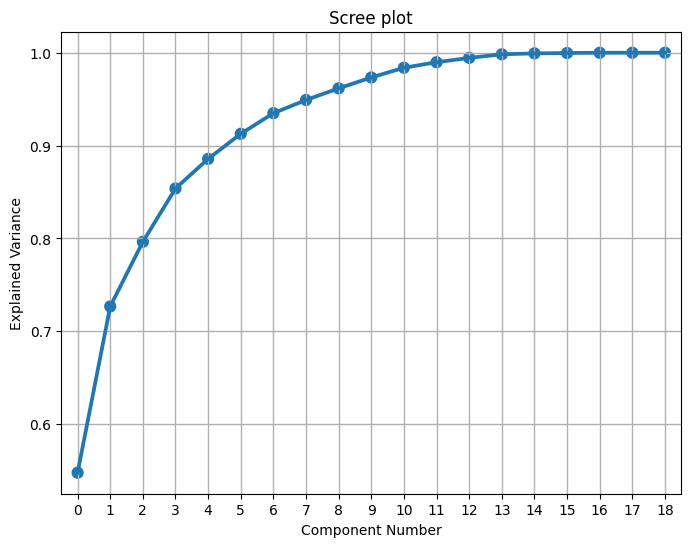

In [1275]:
n_components=19
pca = PCA(n_components)
Norm_set = pca.fit_transform(Norm_set)

w=np.cumsum(pca.explained_variance_ratio_)

DR=pd.DataFrame()
for i in range(0, n_components):
    DR['PC' + str(i + 1)] = Norm_set[:, i]

print(w)

ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=w)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.grid(linestyle='-', linewidth=1)
plt.show()

By calculating the variance ratio, we can see that the first 5 principal components retain about 90% of the variability in the data set while reducing 14 (19-5) features in the data set.

To get more info on how many of the components have more weight, I will try to display the correlation circle 

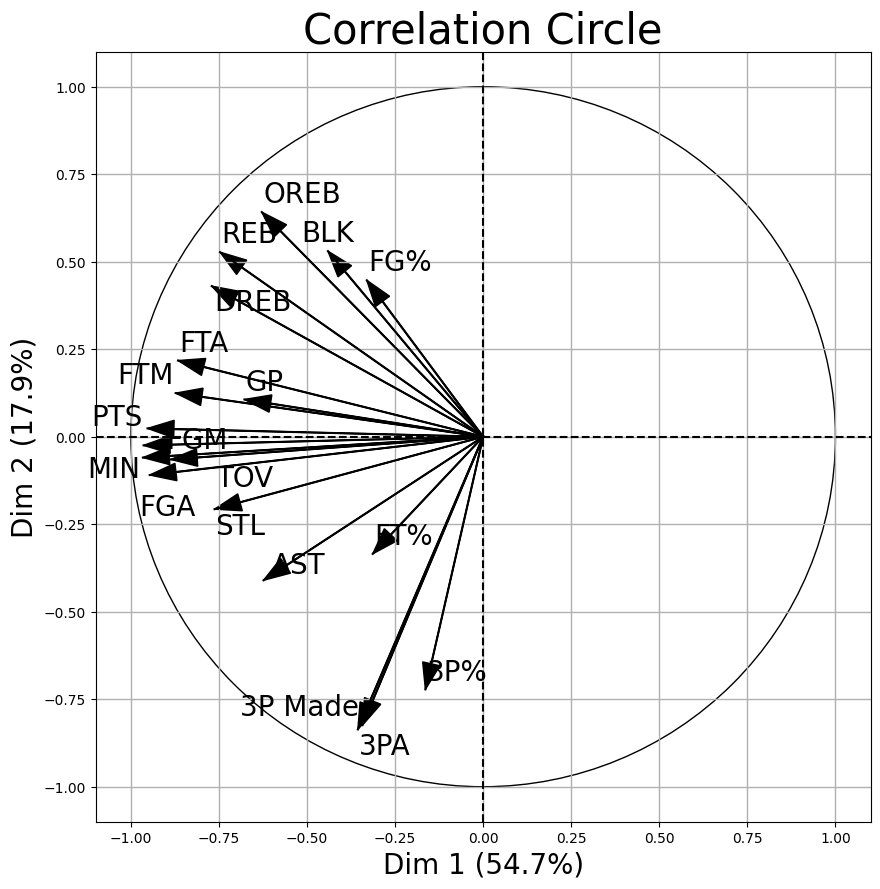

In [1276]:
from mlxtend.plotting import plot_pca_correlation_graph

attribute_names=paramset

fig, correlation_matrix = plot_pca_correlation_graph(
    Norm_affich_BAR, 
    attribute_names,
    dimensions=(1, 2),
    figure_axis_size=10)
plt.grid(linestyle='-', linewidth=1)


From the correlation circle we can consider 4 components that are strongly related to the component PC0(54.7%) [PTS,MIN,GM,FGA,FTM,FTA] and [REB,OREB] Related to the components PC0(54.7%) & PC1(17.9%),which all can be interpreted.


Based on this statistics, we will choose 7 principal components to define our new data set: 'New_set'.
With 7 coposants, we already exceed 95%.


In [1277]:
n_components=7

pca = PCA(n_components)
New_set = pca.fit_transform(Norm_set)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Modeling:

* Splitting data into training and testing

Text(0.5, 1.0, 'Test set')

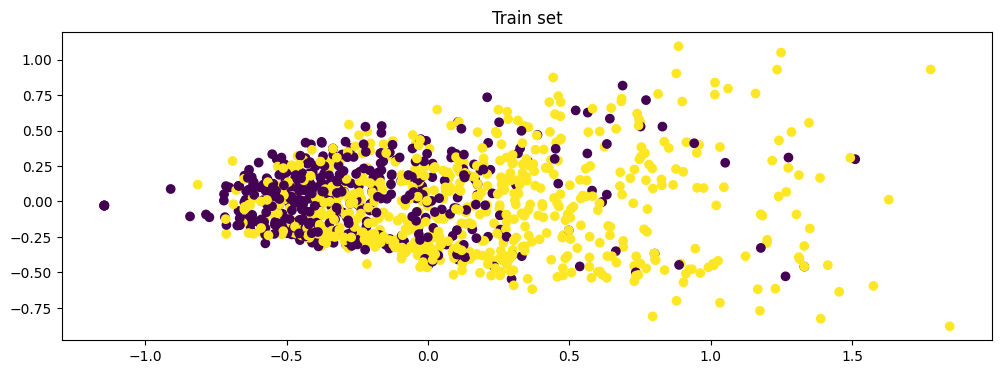

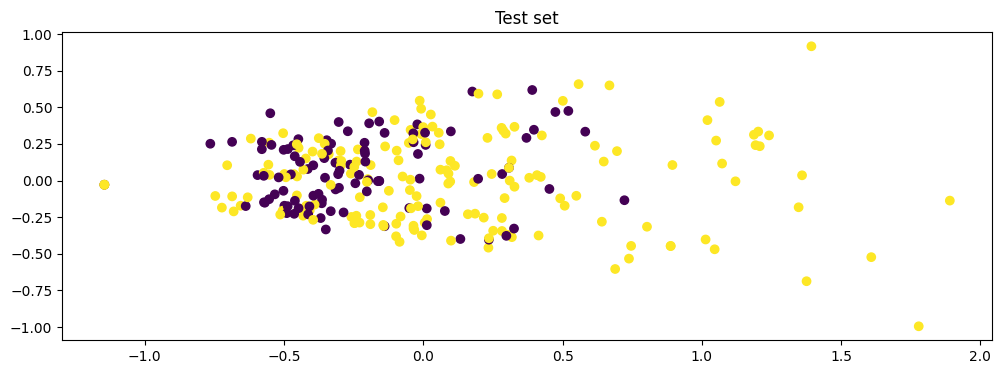

In [1278]:
from sklearn.model_selection import train_test_split



train_set,test_set,train_lab,test_lab=train_test_split(New_set,labels,test_size=0.2,random_state=5)

plt.figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.scatter(train_set[:,0],train_set[:,1],c=train_lab)
plt.title("Train set")

plt.figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.scatter(test_set[:,0],test_set[:,1],c=test_lab)
plt.title("Test set")

-----------------------------------------------------------------------------------------------------------------------------------------------------

> Model KNeighborsClassifier

*Training model:

In [1279]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

mod_KN=KNeighborsClassifier(n_neighbors=10)
mod_KN.fit(train_set,train_lab)
predicted_KN=mod_KN.predict(test_set)

print(classification_report(test_lab,predicted_KN))

              precision    recall  f1-score   support

         0.0       0.56      0.63      0.59        97
         1.0       0.77      0.72      0.75       171

    accuracy                           0.69       268
   macro avg       0.67      0.67      0.67       268
weighted avg       0.70      0.69      0.69       268



* Optimization:
  
At this section i will try to found the best value of "n_neighbors" parameter

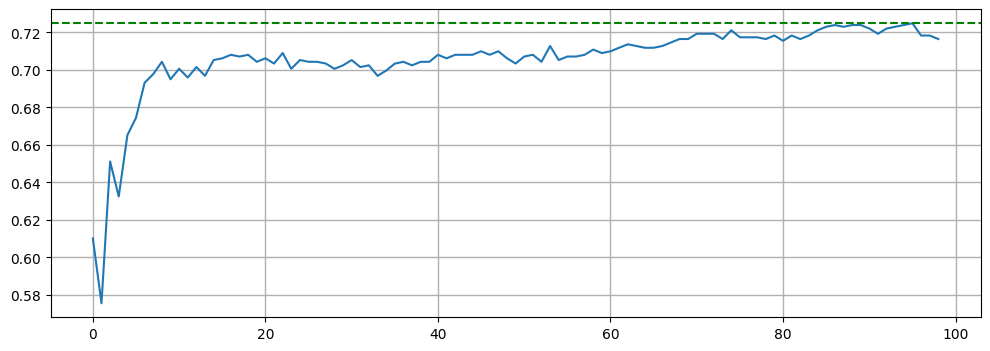

In [1280]:
from sklearn.model_selection import cross_val_score
Param=[]
for p in range(1,100):
    Valsc=cross_val_score(KNeighborsClassifier(n_neighbors=p),train_set,train_lab,cv=5, scoring="accuracy").mean()
    Param.append(Valsc)
plt.figure(figsize=(12,4))
plt.subplot(1,1,1)
plt.plot(Param) 
plt.axhline(y = max(Param), color = 'g', linestyle = '--')
plt.grid(linestyle='-', linewidth=1)

The optimal value of "n_neighbors" is about 90

* Cross Validation: 

we verify overfitting scenario KFold Method

In [1281]:
from sklearn.model_selection import KFold
mod_KN=KNeighborsClassifier(n_neighbors=90)
Scores=[]
def score_classifier(dataset,classifier,labels):
    
        kf = KFold(n_splits=5,random_state=5,shuffle=True)
        confusion_mat = np.zeros((2,2))
        recall = 0
        for training_ids,test_ids in kf.split(dataset):
            training_set = dataset[training_ids]
            training_labels = labels[training_ids]
            test_set = dataset[test_ids]
            test_labels = labels[test_ids]
            classifier.fit(training_set,training_labels)
            predicted_labels = classifier.predict(test_set)
            Scores.append(classifier.score(test_set,test_labels))
            confusion_mat +=confusion_matrix(test_labels,predicted_labels)
            recall += recall_score(test_labels, predicted_labels)
        recall/=5  

        print("True positive:" ,confusion_mat[0][0], "False negative:" ,confusion_mat[0][1] )
        print("False positive:" ,confusion_mat[1][0], "True negative:" ,confusion_mat[1][1] )
        print("recall Value :",recall)
        print("Accuracy Rate for every fold: ",Scores)
        return recall

L_KN=["KNeighborsClassifier",score_classifier(New_set,mod_KN,labels)]

True positive: 292.0 False negative: 217.0
False positive: 182.0 True negative: 649.0
recall Value : 0.7818309655477516
Accuracy Rate for every fold:  [0.664179104477612, 0.6940298507462687, 0.7126865671641791, 0.746268656716418, 0.6940298507462687]


* We can see that the Folds are well balanced with a Total Recall accuracy rate of 78%.--> "No overfitting"

--------------------------------------------------------------------------------------------------------------------------------------------------

>RandomForestClassifier Model :

* Training model:

In [1282]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

mod_RD=RandomForestClassifier(max_leaf_nodes=10)
mod_RD.fit(train_set,train_lab)
score1=mod_RD.score(test_set,test_lab)
predicted_RD=mod_RD.predict(test_set)

print(classification_report(test_lab, predicted_RD))


              precision    recall  f1-score   support

         0.0       0.58      0.49      0.53        97
         1.0       0.74      0.80      0.76       171

    accuracy                           0.69       268
   macro avg       0.66      0.65      0.65       268
weighted avg       0.68      0.69      0.68       268



* Optimization
 
At this section i will try to found the best value of "max_leaf_nodes" parameter

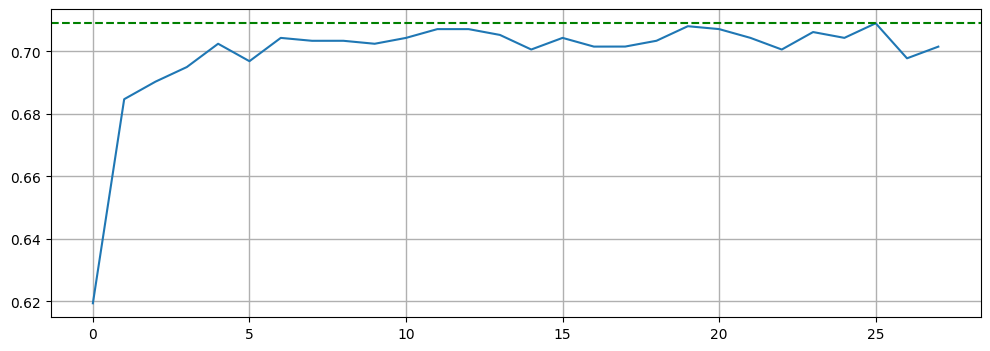

In [1283]:
from sklearn.model_selection import cross_val_score
Param=[]
for j in range(1,30):
    score=cross_val_score(RandomForestClassifier(max_leaf_nodes=j),train_set,train_lab, cv=5, scoring="accuracy").mean()
    Param.append(score)
Param.remove(Param[0])
plt.figure(figsize=(12,4))
plt.subplot(1,1,1)

plt.plot(Param)
plt.axhline(y = max(Param), color = 'g', linestyle = '--')
plt.grid(linestyle='-', linewidth=1)


The optimal value of "max_leaf_nodes" is about 15

* Cross Validation: 

we verify overfitting scenario KFold Method

In [1296]:
mod_RD=RandomForestClassifier(max_leaf_nodes=16)
from sklearn.model_selection import KFold
L_RD=[]
Scores=[]
def score_classifier(dataset,classifier,labels):
        kf = KFold(n_splits=5,random_state=5,shuffle=True)
        confusion_mat = np.zeros((2,2))
        recall = 0
        for training_ids,test_ids in kf.split(dataset):
            training_set = dataset[training_ids]
            training_labels = labels[training_ids]
            test_set = dataset[test_ids]
            test_labels = labels[test_ids]
            classifier.fit(training_set,training_labels)
            predicted_labels = classifier.predict(test_set)
            Scores.append(classifier.score(test_set,test_labels))
            confusion_mat +=confusion_matrix(test_labels,predicted_labels)
            recall += recall_score(test_labels, predicted_labels)
        recall/=5      
        print("True positive:" ,confusion_mat[0][0], "False negative:" ,confusion_mat[0][1] )
        print("False positive:" ,confusion_mat[1][0], "True negative:" ,confusion_mat[1][1] )
        print("recall Value :",recall)
        print("Accuracy Rate for every fold: ",Scores)
        return recall
L_RD=["RandomForestClassifier",score_classifier(New_set,mod_RD,labels)]

True positive: 255.0 False negative: 254.0
False positive: 133.0 True negative: 698.0
recall Value : 0.8403544859793864
Accuracy Rate for every fold:  [0.6828358208955224, 0.7201492537313433, 0.7201492537313433, 0.7238805970149254, 0.7089552238805971]


* We can see that the Folds are well balanced with a Total Recall accuracy rate of 84%.--> "No overfitting"

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

>Support vector machine Model:

* training Model  :

In [1297]:
from sklearn.svm import SVC

mod_SVC=SVC()
mod_SVC.fit(train_set,train_lab)
score_SVC=mod_SVC.score(test_set,test_lab)
predicted_SVC=mod_SVC.predict(test_set)
print(classification_report(test_lab, predicted_SVC))


              precision    recall  f1-score   support

         0.0       0.56      0.54      0.55        97
         1.0       0.74      0.76      0.75       171

    accuracy                           0.68       268
   macro avg       0.65      0.65      0.65       268
weighted avg       0.68      0.68      0.68       268



* Cross Validation: 

we verify overfitting scenario KFold Method

In [1286]:
from sklearn.model_selection import KFold

L_SVC=[]
def score_classifier(dataset,classifier,labels):
    
        kf = KFold(n_splits=5,random_state=5,shuffle=True)
        confusion_mat = np.zeros((2,2))
        recall = 0
        Scores=[]
        for training_ids,test_ids in kf.split(dataset):
            training_set = dataset[training_ids]
            training_labels = labels[training_ids]
            test_set = dataset[test_ids]
            test_labels = labels[test_ids]
            classifier.fit(training_set,training_labels)
            predicted_labels = classifier.predict(test_set)
            Scores.append(classifier.score(test_set,test_labels))
            confusion_mat +=confusion_matrix(test_labels,predicted_labels)
            recall += recall_score(test_labels, predicted_labels)
        recall/=5  

        print("True positive:" ,confusion_mat[0][0], "False negative:" ,confusion_mat[0][1] )
        print("False positive:" ,confusion_mat[1][0], "True negative:" ,confusion_mat[1][1] )
        print("recall Value is: ",recall)
        print("Accuracy Rate for every fold: ",Scores)
        return recall

L_SVC=["SVC",score_classifier(New_set,mod_SVC,labels)]


True positive: 270.0 False negative: 239.0
False positive: 151.0 True negative: 680.0
recall Value is:  0.8188692703906488
Accuracy Rate for every fold:  [0.6791044776119403, 0.7164179104477612, 0.7238805970149254, 0.7350746268656716, 0.6902985074626866]


* We can see that the Folds are well balanced with a Total Recall accuracy rate of 81%.--> "No overfitting"

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

>DecisionTreeClassifier Model :

* Training Model:

In [1298]:
from sklearn.tree import DecisionTreeClassifier

mod_DS=DecisionTreeClassifier(criterion="entropy", max_depth=10)
mod_DS.fit(train_set,train_lab)
score_DS=mod_DS.score(test_set,test_lab)
predicted_DS=mod_DS.predict(test_set)

print(classification_report(test_lab, predicted_DS))

              precision    recall  f1-score   support

         0.0       0.39      0.52      0.44        97
         1.0       0.66      0.54      0.60       171

    accuracy                           0.53       268
   macro avg       0.53      0.53      0.52       268
weighted avg       0.57      0.53      0.54       268



* Optimization:
 
At this section i will try to found the best value of "max_depth" parameter

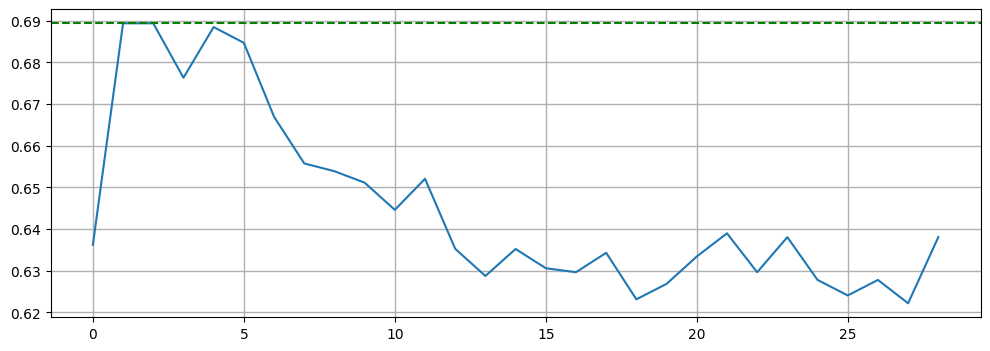

In [1288]:

from sklearn.model_selection import cross_val_score
Param=[]
for p in range(1,30):
    score=cross_val_score(DecisionTreeClassifier(criterion="entropy", max_depth=p),train_set,train_lab,cv=5, scoring="accuracy").mean()
    Param.append(score)
plt.figure(figsize=(12,4))
plt.subplot(1,1,1)
ax=plt.plot(Param)
ax=plt.axhline(y = max(Param), color = 'g', linestyle = '--')
plt.grid(linestyle='-', linewidth=1)



The optimal value of "max_depth" is about 2

* Cross Validation: 

we verify overfitting scenario KFold Method

In [1289]:
from sklearn.model_selection import KFold

mod_DS=DecisionTreeClassifier(criterion="entropy", max_depth=4)
L_DS=[]
def score_classifier(dataset,classifier,labels):
    
        kf = KFold(n_splits=5,random_state=5,shuffle=True)
        confusion_mat = np.zeros((2,2))
        Scores=[]
        recall = 0
        for training_ids,test_ids in kf.split(dataset):
            training_set = dataset[training_ids]
            training_labels = labels[training_ids]
            test_set = dataset[test_ids]
            test_labels = labels[test_ids]
            classifier.fit(training_set,training_labels)
            predicted_labels = classifier.predict(test_set)
            Scores.append(classifier.score(test_set,test_labels))
            confusion_mat +=confusion_matrix(test_labels,predicted_labels)
            recall += recall_score(test_labels, predicted_labels)
        recall/=5 

        

        print("True positive:" ,confusion_mat[0][0], "False negative:" ,confusion_mat[0][1] )
        print("False positive:" ,confusion_mat[1][0], "True negative:" ,confusion_mat[1][1] )
        print("recall rate: ",recall)
        print("Accuracy Rate: ",Scores)
        
        return recall
        
L_DS=["DecisionTreeClassifier",score_classifier(New_set,mod_DS,labels)]

True positive: 266.0 False negative: 243.0
False positive: 194.0 True negative: 637.0
recall rate:  0.76698479619099
Accuracy Rate:  [0.6529850746268657, 0.664179104477612, 0.6940298507462687, 0.6716417910447762, 0.6865671641791045]


* We can see that the Folds are well balanced with a Total Recall accuracy rate of 76%.--> "No overfitting"

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Evaluation :

*In this section, we will try to evaluate our models.
*I will try to choose the classification model that has the best recall rate.

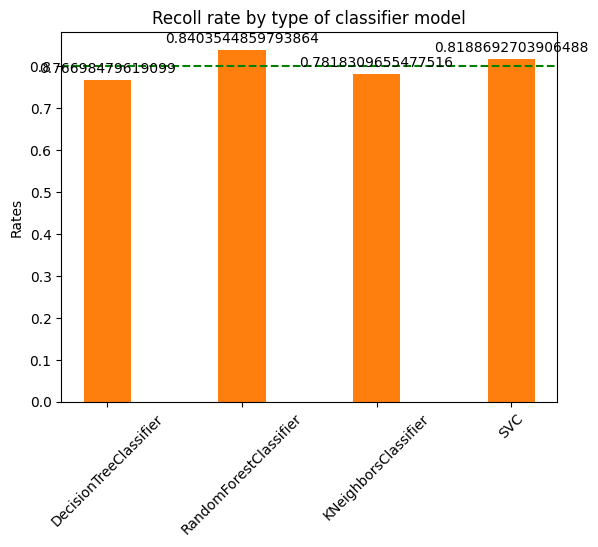

In [1302]:
import matplotlib
import numpy as np


algo=[L_DS[0],L_RD[0],L_KN[0],L_SVC[0]]
recall_means = [L_DS[1],L_RD[1],L_KN[1],L_SVC[1]]


width = 0.35  

fig.tight_layout()

fig, ax = plt.subplots()
reult1 = ax.bar(algo, recall_means, width, label='recall')
plt.bar(algo, recall_means, width, label='recall')
plt.axhline(y =0.8, color = 'g', linestyle = '--')


ax.set_ylabel('Rates')
ax.set_title('Recoll rate by type of classifier model')
plt.xticks(rotation=45)


def Barlabel(rect):
    for rect in reult1:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


Barlabel(reult1)
#autolabel(rects2)


plt.show()

Based on our presentation All classifier models present a good recall rate (>78%)
So we choose the best one : RandomForestClassifier

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Saving the model

* Serialization

In order to Create an API REST From a Machine Learning, we will try to save our model by serializing it


In [ ]:
import joblib

mod_RDD=RandomForestClassifier(max_leaf_nodes=17)

train_set,test_set,train_lab,test_lab=train_test_split(Norm_set,labels,test_size=0.2)

mod_RDD.fit(train_set,train_lab)

#Saving the Model: Serialization 
joblib.dump(mod_RDD,'Machine_11.pkl')
print("Random Forest Model Saved")



# Save columns Model
modul_columns = list(paramset)
joblib.dump(modul_columns, 'model_columns_11.pkl')
print("Colums Saved")



Random Forest Model Saved
Colums Saved


* The Regression model is now persisted. Now we can load this model into memory